# 🧪 Breast Cancer + SVM 分类实验

## 📊 第一步：数据预处理与可视化
### 加载乳腺癌数据集
`load_breast_cancer`：加载乳腺癌数据集（包含特征和标签）。
`StandardScaler` 和 `PCA`：用于标准化和降维（当前未使用）。
`pandas`：用于数据表结构处理。
`matplotlib.pyplot` 和 `seaborn`：用于绘图和可视化。
- 标准化处理
- 初步可视化两个特征

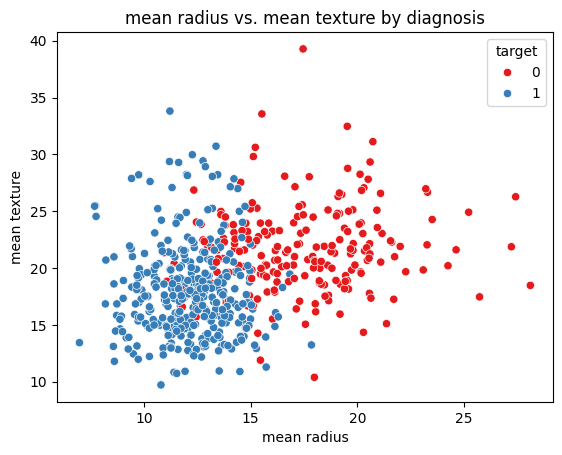

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

df = X.copy()
df['target'] = y

sns.scatterplot(data=df, x="mean radius", y="mean texture", hue="target", palette="Set1")
plt.title("mean radius vs. mean texture by diagnosis")
plt.show()

## 📉 第二步：使用 Principal Component Analysis (PCA，主成分分析) 进行降维
- 使用 `StandardScaler` 对数据标准化
- 将特征降维到二维便于可视化

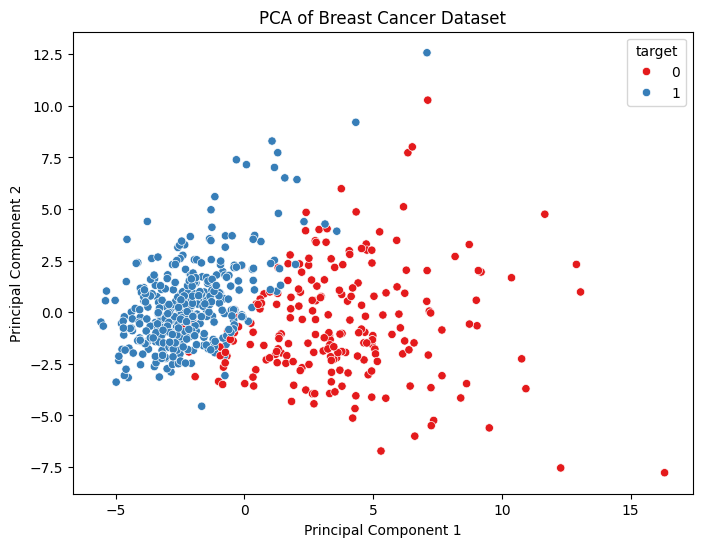

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1")
plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## 🤖 第三步：基于 PCA 数据进行 SVM 分类

### 1️⃣ 使用sklearn中的SVC进行计算
- 数据划分为训练集与测试集
- 训练 `SVM` 分类器
- 输出分类报告和混淆矩阵

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



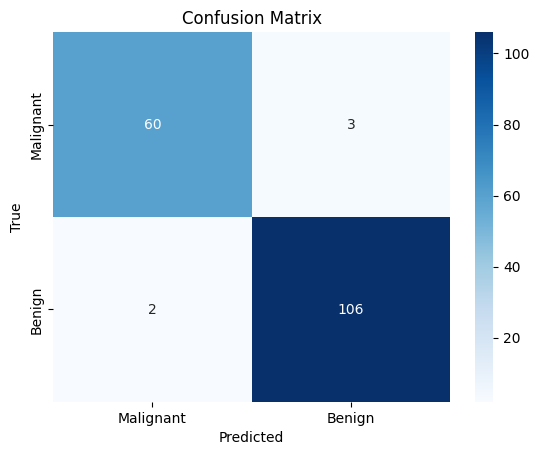

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

print(classification_report(y_test, svm_predictions))

conf_matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()